11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\tjdus\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 38ms/step - accuracy: 0.8826 - loss: 0.3721 - val_accuracy: 0.9813 - val_loss: 0.0601
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9834 - loss: 0.0521 - val_accuracy: 0.9878 - val_loss: 0.0400
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9891 - loss: 0.0339 - val_accuracy: 0.9902 - val_loss: 0.0355
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9915 - loss: 0.0252 - val_accuracy: 0.9895 - val_loss: 0.0382
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 27ms/step - accuracy: 0.9938 - loss: 0.0199 - val_accuracy: 0.9898 - val_loss: 0.0380
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9871 - loss: 0.0419

Test Accuracy: 99.02%
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


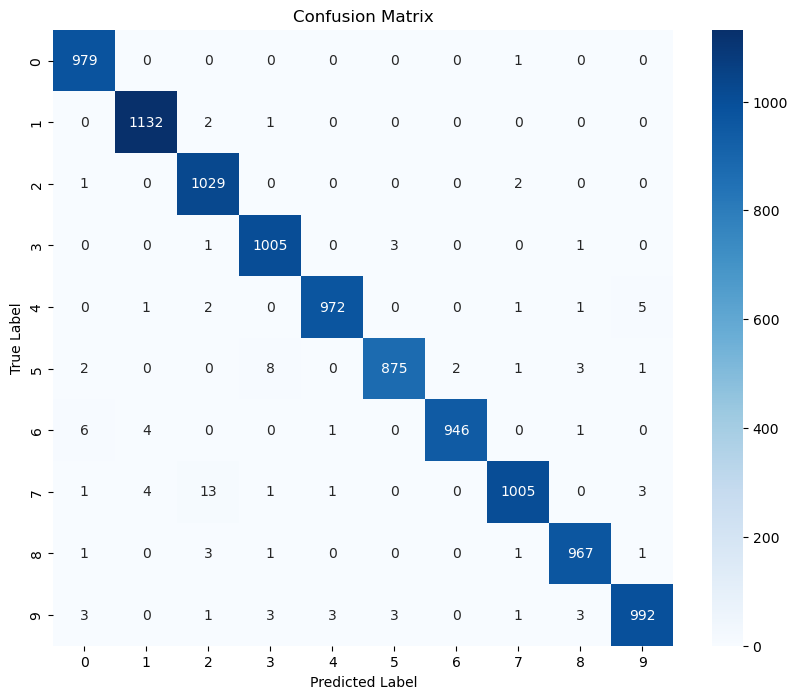


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# 1. 데이터 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 차원 확장 (CNN 입력으로 만들기)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 0~1 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. CNN 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 요약 출력
model.summary()

# 5. 모델 학습
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# 6. 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')

# 7. 예측 및 혼동 행렬 출력
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# 혼동 행렬 시각화
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(test_labels, y_pred_classes))
